In [1]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
ahr_motif_path = "motif_ahr_atac_intersect.bed"
tead1_motif_path = "motif_tead1_atac_intersect.bed"
tead2_motif_path = "motif_tead2_atac_intersect.bed"
tead3_motif_path = "motif_tead3_atac_intersect.bed"
tead4_motif_path = "motif_tead4_atac_intersect.bed"

ahr_motif_path_nochip = "motif_ahr_atac_nointersect.bed"
tead1_motif_path_nochip = "motif_tead1_atac_nointersect.bed"
tead2_motif_path_nochip = "motif_tead2_atac_nointersect.bed"
tead3_motif_path_nochip = "motif_tead3_atac_nointersect.bed"
tead4_motif_path_nochip = "motif_tead4_atac_nointersect.bed"

annotated_atac_path = "ahr_tobais_atac_annotated.bed"

In [3]:
output_folder = "_output_ucsc"
data_output_folder = "_output_data"

In [4]:
df_ahr_motif = pd.read_csv(ahr_motif_path, sep='\t', header=None, names=['chrom','start','end','name','score','chrom_2','start_2','end_2','name_2','score_2','chrom_3','start_3','end_3','name_3','score_3','strand_3','overlap'])
df_ahr_motif

,chrom,start,end,name,score,chrom_2,start_2,end_2,name_2,score_2,chrom_3,start_3,end_3,name_3,score_3,strand_3,overlap
0,chr1,44552810,44552816,chr1:44552810-44552816,0.07256,chr1,44551390,44554287,Interval_1096,0.449203,chr1,44552591,44552998,ALL_peak_1942,19.45451,+,407
1,chr1,44552816,44552822,chr1:44552816-44552822,0.07256,chr1,44551390,44554287,Interval_1096,0.449203,chr1,44552591,44552998,ALL_peak_1942,19.45451,+,407
2,chr1,44553674,44553680,chr1:44553674-44553680,0.35039,chr1,44551390,44554287,Interval_1096,0.449203,chr1,44552591,44552998,ALL_peak_1942,19.45451,+,407
3,chr1,54585546,54585552,chr1:54585546-54585552,-0.40494,chr1,54584565,54586395,Interval_1363,0.720508,chr1,54585873,54586115,ALL_peak_2368,5.26075,+,242
4,chr1,54585546,54585552,chr1:54585546-54585552,-0.40494,chr1,54584565,54586395,Interval_1363,0.720508,chr1,54584645,54584907,ALL_peak_2367,11.29765,+,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,chr9,99414736,99414742,chr9:99414736-99414742,-0.99902,chr9,99414258,99416167,Interval_82474,0.854551,chr9,99414142,99414474,ALL_peak_119602,9.96851,+,216
290,chr9,116190169,116190175,chr9:116190169-116190175,-0.69566,chr9,116186831,116191248,Interval_83191,0.330017,chr9,116187996,116188199,ALL_peak_120583,6.15282,+,203
291,chr9,122824114,122824120,chr9:122824114-122824120,0.80745,chr9,122823194,122824139,Interval_83553,0.597318,chr9,122823002,122823261,ALL_peak_121026,5.98111,+,67
292,chrX,169974662,169974668,chrX:169974662-169974668,0.00000,chrX,169973050,169976568,Interval_85659,-1.793529,chrX,169974528,169974765,ALL_peak_122942,7.89112,+,237


In [5]:
df_tead1_motif = pd.read_csv(tead1_motif_path, sep='\t', header=None, names=['chrom','start','end','name','score','chrom_2','start_2','end_2','name_2','score_2','chrom_3','start_3','end_3','name_3','score_3','strand_3','overlap'])
df_tead2_motif = pd.read_csv(tead2_motif_path, sep='\t', header=None, names=['chrom','start','end','name','score','chrom_2','start_2','end_2','name_2','score_2','chrom_3','start_3','end_3','name_3','score_3','strand_3','overlap'])
df_tead3_motif = pd.read_csv(tead3_motif_path, sep='\t', header=None, names=['chrom','start','end','name','score','chrom_2','start_2','end_2','name_2','score_2','chrom_3','start_3','end_3','name_3','score_3','strand_3','overlap'])
df_tead4_motif = pd.read_csv(tead4_motif_path, sep='\t', header=None, names=['chrom','start','end','name','score','chrom_2','start_2','end_2','name_2','score_2','chrom_3','start_3','end_3','name_3','score_3','strand_3','overlap'])

In [6]:
lines = []
lines.append("A-TF\tA-ID\tA-Score\tB-TF\tB-ID\tB-Score\tdistance\tatac-id\n")

for index, row in df_ahr_motif.iterrows():
    atac_peak = row['name_2']
    
    for index2, row2 in df_tead1_motif.iterrows():
        atac_peak_2 = row2['name_2']
        if atac_peak == atac_peak_2:
            center1 = round(row['start'] + (row['end'] - row['start'] / 2))
            center2 = round(row2['start'] + (row2['end'] - row2['start'] / 2))
            dist = abs(center1 - center2)
            
            line = "AHR\t" + row['name'] + "\t" + str(row['score']) + "\tTEAD1\t" + row2['name'] + "\t" + str(row2['score']) + "\t" + str(dist) + "\t" + row['chrom_2'] + ":" + str(row['start_2']) + "-" + str(row['end_2']) + "\n"
            lines.append(line)
            
            
    for index2, row2 in df_tead2_motif.iterrows():
        atac_peak_2 = row2['name_2']
        if atac_peak == atac_peak_2:
            center1 = round(row['start'] + (row['end'] - row['start'] / 2))
            center2 = round(row2['start'] + (row2['end'] - row2['start'] / 2))
            dist = abs(center1 - center2)
            
            line = "AHR\t" + row['name'] + "\t" + str(row['score']) + "\tTEAD2\t" + row2['name'] + "\t" + str(row2['score']) + "\t" + str(dist) + "\t" + row['chrom_2'] + ":" + str(row['start_2']) + "-" + str(row['end_2']) + "\n"
            lines.append(line)
            
    for index2, row2 in df_tead3_motif.iterrows():
        atac_peak_2 = row2['name_2']
        if atac_peak == atac_peak_2:
            center1 = round(row['start'] + (row['end'] - row['start'] / 2))
            center2 = round(row2['start'] + (row2['end'] - row2['start'] / 2))
            dist = abs(center1 - center2)
            
            line = "AHR\t" + row['name'] + "\t" + str(row['score']) + "\tTEAD3\t" + row2['name'] + "\t" + str(row2['score']) + "\t" + str(dist) + "\t" + row['chrom_2'] + ":" + str(row['start_2']) + "-" + str(row['end_2']) + "\n"
            lines.append(line)
            
    for index2, row2 in df_tead4_motif.iterrows():
        atac_peak_2 = row2['name_2']
        if atac_peak == atac_peak_2:
            center1 = round(row['start'] + (row['end'] - row['start'] / 2))
            center2 = round(row2['start'] + (row2['end'] - row2['start'] / 2))
            dist = abs(center1 - center2)
            
            line = "AHR\t" + row['name'] + "\t" + str(row['score']) + "\tTEAD4\t" + row2['name'] + "\t" + str(row2['score']) + "\t" + str(dist) + "\t" + row['chrom_2'] + ":" + str(row['start_2']) + "-" + str(row['end_2']) + "\n"
            lines.append(line)

In [7]:
with open(os.path.join(data_output_folder, "distances.tsv"), 'w') as file:
    for line in lines:
        file.write(line)

In [8]:
df_distances = pd.read_csv(os.path.join(data_output_folder, "distances.tsv"), sep='\t')
df_distances

,A-TF,A-ID,A-Score,B-TF,B-ID,B-Score,distance,atac-id
0,AHR,chr1:44552810-44552816,0.07256,TEAD1,chr1:44552629-44552639,0.89785,267,chr1:44551390-44554287
1,AHR,chr1:44552810-44552816,0.07256,TEAD2,chr1:44552627-44552640,0.89633,267,chr1:44551390-44554287
2,AHR,chr1:44552810-44552816,0.07256,TEAD3,chr1:44552630-44552638,0.89785,268,chr1:44551390-44554287
3,AHR,chr1:44552810-44552816,0.07256,TEAD4,chr1:44552629-44552639,0.89785,267,chr1:44551390-44554287
4,AHR,chr1:44552816-44552822,0.07256,TEAD1,chr1:44552629-44552639,0.89785,276,chr1:44551390-44554287
...,...,...,...,...,...,...,...,...
993,AHR,chrX:169974662-169974668,0.00000,TEAD1,chrX:169975197-169975207,0.00000,807,chrX:169973050-169976568
994,AHR,chrX:169974662-169974668,0.00000,TEAD2,chrX:169975195-169975208,0.00000,807,chrX:169973050-169976568
995,AHR,chrX:169974662-169974668,0.00000,TEAD3,chrX:169975198-169975206,0.00000,806,chrX:169973050-169976568
996,AHR,chrX:169974662-169974668,0.00000,TEAD4,chrX:169974501-169974511,0.00000,237,chrX:169973050-169976568


In [9]:
sns.set()
sns.set_theme()
sns.set_context("paper")

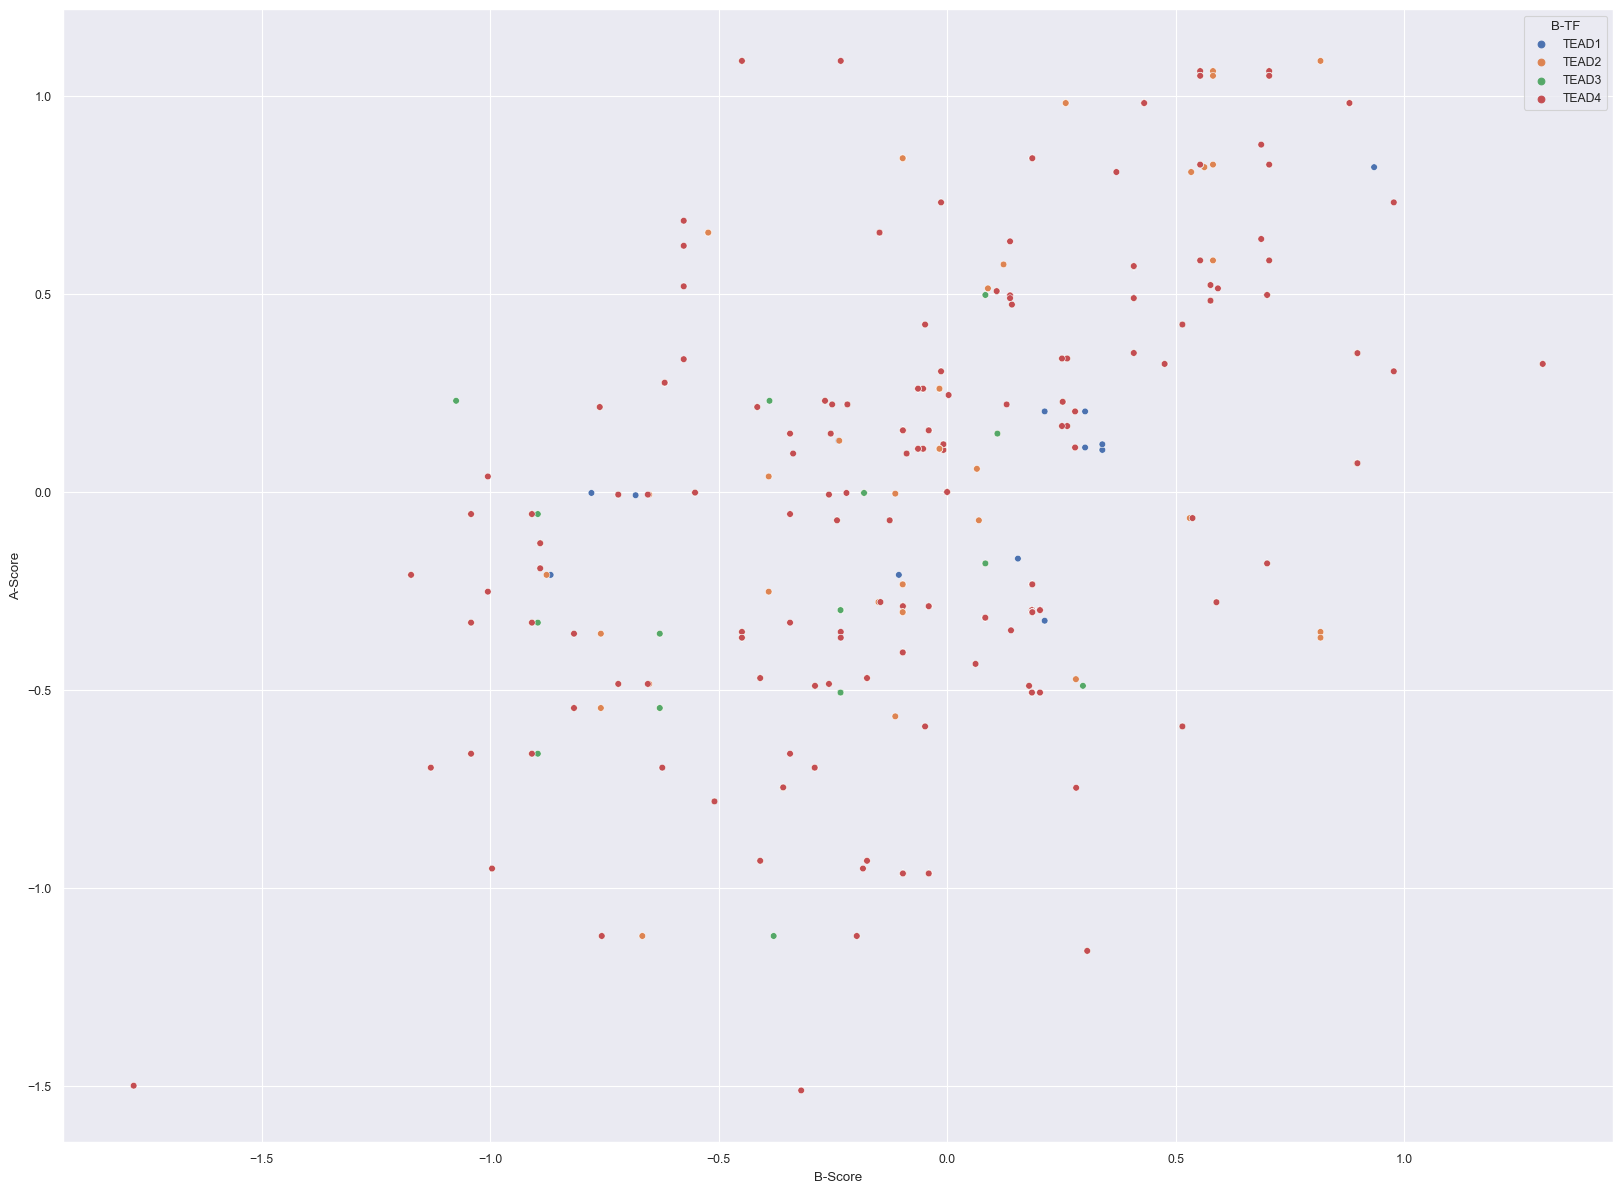

In [14]:

#fig, ax = plt.subplots()
plt.figure(figsize=(20,15), dpi= 100)
ax = sns.scatterplot(data=df_distances, x="B-Score", y="A-Score", hue="B-TF")

Text(0.5, 1.0, 'Intra-ATAC region distance between Ahr motifs and TEAD motifs')

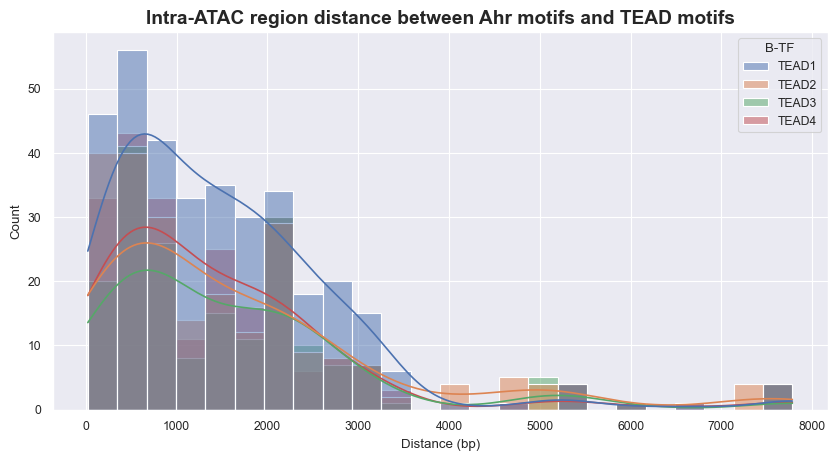

In [27]:
plt.figure(figsize=(10,5), dpi= 100)
ax = sns.histplot(data=df_distances, x="distance", hue="B-TF", kde=True)
ax.set_xlabel("Distance (bp)")
ax.set_title("Intra-ATAC region distance between Ahr motifs and TEAD motifs", fontsize="x-large", fontweight="bold")

In [40]:
atac_regions = df_distances['atac-id'].unique()

In [38]:
annotated_regions = pd.read_csv(annotated_atac_path, sep='\t', header=None, names=['chrom','start','end','name','score','region_type','Unigene','Refseq','Ensembl','gene_name'])
annotated_regions['atac-id'] = annotated_regions['chrom'] + ":" + annotated_regions['start'].astype(str) + "-" + annotated_regions['end'].astype(str)
annotated_regions = annotated_regions.set_index('atac-id')
annotated_regions

,chrom,start,end,name,score,region_type,Unigene,Refseq,Ensembl,gene_name
atac-id,,,,,,,,,,
chr1:3045788-3047077,chr1,3045788,3047077,Interval_1,1.128569,Intergenic,ENSMUSG00000102693,ENSMUSG00000102693,ENSMUST00000193812,4933401J01Rik
chr10:116266366-116268185,chr10,116266366,116268185,Interval_10023,0.821680,intron,ENSMUSG00000020154,ENSMUSG00000020154,ENSMUST00000092167,Ptprb
chr10:119958009-119959366,chr10,119958009,119959366,Interval_10191,-1.196677,intron,ENSMUSG00000034813,ENSMUSG00000034813,ENSMUST00000130387,Grip1
chr10:120003074-120004718,chr10,120003074,120004718,Interval_10194,-1.192150,intron,ENSMUSG00000034813,ENSMUSG00000034813,ENSMUST00000130387,Grip1
chr1:43151617-43155143,chr1,43151617,43155143,Interval_1020,0.400868,intron,ENSMUSG00000094497,ENSMUSG00000094497,ENSMUST00000178557,Gm8210
...,...,...,...,...,...,...,...,...,...,...
chr1:40840292-40841925,chr1,40840292,40841925,Interval_985,0.785958,intron,ENSMUSG00000094136,ENSMUSG00000094136,ENSMUST00000178542,Gm5973
chr10:111455855-111456762,chr10,111455855,111456762,Interval_9875,0.780014,Intergenic,ENSMUSG00000058799,ENSMUSG00000058799,ENSMUST00000065917,Nap1l1
chr10:111558198-111560225,chr10,111558198,111560225,Interval_9891,0.494890,Intergenic,ENSMUSG00000097082,ENSMUSG00000097082,ENSMUST00000181547,4933440J02Rik


In [53]:
subset_regions = annotated_regions[annotated_regions.index.isin(atac_regions)]
subset_regions = subset_regions.sort_index()
subset_regions

,chrom,start,end,name,score,region_type,Unigene,Refseq,Ensembl,gene_name
atac-id,,,,,,,,,,
chr10:127149988-127153171,chr10,127149988,127153171,Interval_10470,0.744809,Intergenic,ENSMUSG00000088672,ENSMUSG00000088672,ENSMUST00000158047,Gm23664
chr10:25432271-25436291,chr10,25432271,25436291,Interval_7105,0.488307,intron,ENSMUSG00000019978,ENSMUSG00000019978,ENSMUST00000092645,Epb4.1l2
chr10:3111465-3115273,chr10,3111465,3115273,Interval_6213,-1.252353,Intergenic,ENSMUSG00000071434,ENSMUSG00000071434,ENSMUST00000095874,9230019H11Rik
chr10:61506054-61507093,chr10,61506054,61507093,Interval_8009,0.901749,intron,ENSMUSG00000043126,ENSMUSG00000043126,ENSMUST00000051330,D830039M14Rik
chr10:68229679-68232155,chr10,68229679,68232155,Interval_8188,0.532114,intron,ENSMUSG00000019947,ENSMUSG00000019947,ENSMUST00000020106,Arid5b
...,...,...,...,...,...,...,...,...,...,...
chr8:79027981-79031077,chr8,79027981,79031077,Interval_77062,0.356667,intron,ENSMUSG00000064926,ENSMUSG00000064926,ENSMUST00000082992,Gm22044
chr8:79208377-79210295,chr8,79208377,79210295,Interval_77077,0.663293,Intergenic,ENSMUSG00000071064,ENSMUSG00000071064,ENSMUST00000145827,Zfp827
chr9:116186831-116191248,chr9,116186831,116191248,Interval_83191,0.330017,Intergenic,ENSMUSG00000032440,ENSMUSG00000032440,ENSMUST00000061101,Tgfbr2


In [71]:
gene_names = pd.DataFrame(subset_regions['Refseq'].unique())
gene_names

,0
0,ENSMUSG00000088672
1,ENSMUSG00000019978
2,ENSMUSG00000071434
3,ENSMUSG00000043126
4,ENSMUSG00000019947
...,...
66,ENSMUSG00000064926
67,ENSMUSG00000071064
68,ENSMUSG00000032440
69,ENSMUSG00000088086


In [72]:
subset_regions.to_csv(os.path.join(data_output_folder, "ahr_teads_atac_regions.tsv"), sep='\t')
gene_names.to_csv(os.path.join(data_output_folder, "ahr_teads_atac_gene_names.tsv"), sep='\t', index=False, header=False)

Text(0.5, 1.0, 'ATAC Regions With Ahr and TEADS Motifs by Type')

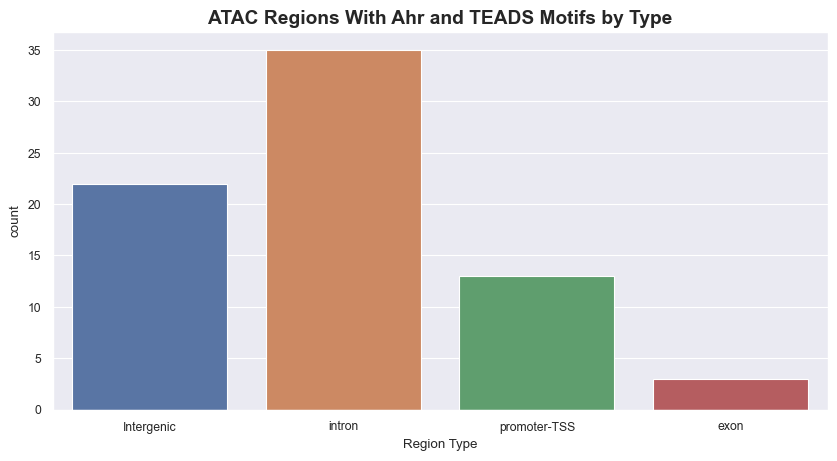

In [68]:
plt.figure(figsize=(10,5), dpi= 100)
ax = sns.countplot(data=subset_regions, x="region_type")
ax.set_xlabel("Region Type")
ax.set_title("ATAC Regions With Ahr and TEADS Motifs by Type", fontsize="x-large", fontweight="bold")

# Suggesting enhancer bias